In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
%matplotlib inline

In [36]:
train_df = pd.read_csv('train.csv.zip')
#test_df = pd.read_csv('/content/sample_data/test.csv.zip')

In [5]:
train_df

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,1.0,1,14fdc4b01ae44b025f6c4d28c9097e5f,2016-06-16 02:12:57,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7166867_625fde3...,1950,30-95 29th St,low
34542,50013,1.0,0,9b6cf886379a2511f8c633c84028efe7,2016-05-10 03:17:32,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,5599e962719af3ccc2976855c2d5893c,['https://photos.renthop.com/2/6989251_42a4884...,2600,39 E 1st St,medium
34543,111475,2.0,2,0,2016-04-21 03:29:35,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6905568_01602e3...,5110,2-01 50th Avenue,low
34544,71184,1.0,2,8754cae39f6e053974aa2337017eb3c1,2016-05-14 02:27:47,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7010187_ab1db5d...,3400,400 West 56th Street,medium


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


Выделим числовые признаки:

In [7]:
feats_list = ['bathrooms', 'bedrooms', 'listing_id', 'price']

In [8]:
train_df.isna().sum()

Id                    0
bathrooms             0
bedrooms              0
building_id           0
created               0
description        1037
display_address      88
features              0
latitude              0
listing_id            0
longitude             0
manager_id            0
photos                0
price                 0
street_address        4
TARGET                0
dtype: int64

Разделение на train и test выборки:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train_df.loc[:, feats_list], train_df.loc[:, 'TARGET'].values , test_size=0.33, random_state=35)

In [10]:
X_train.shape

(23145, 4)

In [11]:
y_train

array(['low', 'low', 'low', ..., 'low', 'low', 'high'], dtype=object)

Посмотрим на распределение домов по координатам:

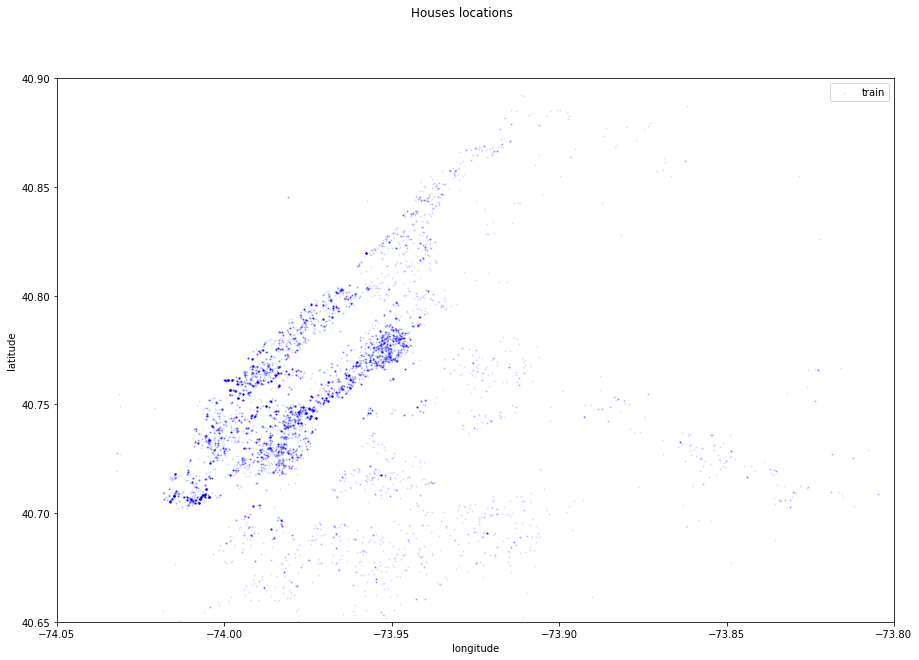

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
N = 10000
ax.scatter(train_df['longitude'].values[:N], train_df['latitude'].values[:N],
           color='blue', s=1, label='train', alpha=0.1)

fig.suptitle('Houses locations')
ax.legend(loc=0)
ax.set_ylabel('latitude')
ax.set_xlabel('longitude')
plt.ylim((40.65, 40.9))
plt.xlim((-74.05, -73.8))
plt.show()

Мультиклассовая логистическая регрессия:

In [ ]:
lg = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial',
                        class_weight='balanced', l1_ratio=0.5)

In [ ]:
lg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                   multi_class='multinomial', penalty='elasticnet',
                   solver='saga')

In [ ]:
y_pred_lg = lg.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred_lg)

0.4309271116568722

In [ ]:
Counter(y_pred_lg).most_common()

[('high', 5785), ('low', 5351), ('medium', 265)]

In [ ]:
Counter(y_test).most_common()

[('low', 7926), ('medium', 2603), ('high', 872)]

Не очень хороший результат.

Попробуем добавить признаков. 

In [37]:
train_df

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,1.0,1,14fdc4b01ae44b025f6c4d28c9097e5f,2016-06-16 02:12:57,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7166867_625fde3...,1950,30-95 29th St,low
34542,50013,1.0,0,9b6cf886379a2511f8c633c84028efe7,2016-05-10 03:17:32,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,5599e962719af3ccc2976855c2d5893c,['https://photos.renthop.com/2/6989251_42a4884...,2600,39 E 1st St,medium
34543,111475,2.0,2,0,2016-04-21 03:29:35,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6905568_01602e3...,5110,2-01 50th Avenue,low
34544,71184,1.0,2,8754cae39f6e053974aa2337017eb3c1,2016-05-14 02:27:47,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7010187_ab1db5d...,3400,400 West 56th Street,medium


Для начала приведем колонку с датой создания объявления к более удобоваримому виду:

In [38]:
train_df["created"] = train_df["created"].astype("datetime64")
train_df['Weekday'] = train_df.created.dt.weekday
train_df['day_of_month'] = train_df.created.dt.day
train_df['hour'] = train_df.created.dt.hour
train_df['is_weekend'] = train_df.created.apply(lambda x: 1 if x.date().weekday() in (5, 6) else 0)
train_df['month'] = train_df.created.dt.month
train_df['week'] = train_df.created.dt.isocalendar().week

In [39]:
train_df.drop(columns=['created'], inplace=True)

In [40]:
train_df

,Id,bathrooms,bedrooms,building_id,description,display_address,features,latitude,listing_id,longitude,...,photos,price,street_address,TARGET,Weekday,day_of_month,hour,is_weekend,month,week
0,57094,1.0,3,0,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,...,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium,3,19,18,0,5,20
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,...,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium,3,16,2,0,6,24
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,...,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low,2,4,2,0,5,18
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,...,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low,3,12,5,0,5,19
4,592,1.0,3,fee4d465932160318364d9d48d272879,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,...,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low,3,16,6,0,6,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,1.0,1,14fdc4b01ae44b025f6c4d28c9097e5f,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,...,['https://photos.renthop.com/2/7166867_625fde3...,1950,30-95 29th St,low,3,16,2,0,6,24
34542,50013,1.0,0,9b6cf886379a2511f8c633c84028efe7,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,...,['https://photos.renthop.com/2/6989251_42a4884...,2600,39 E 1st St,medium,1,10,3,0,5,19
34543,111475,2.0,2,0,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,...,['https://photos.renthop.com/2/6905568_01602e3...,5110,2-01 50th Avenue,low,3,21,3,0,4,16
34544,71184,1.0,2,8754cae39f6e053974aa2337017eb3c1,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,...,['https://photos.renthop.com/2/7010187_ab1db5d...,3400,400 West 56th Street,medium,5,14,2,1,5,19


Какие признаки еще имеет смысл добавить? Наверное, это тип комнаты поделить на цену дома:

In [41]:
train_df['price_per_bedroom']  = train_df["price"] / train_df["bedrooms"]
train_df["price_per_bathroom"] = train_df["price"] / train_df["bathrooms"]
train_df['price_per_bedroom'][train_df['price_per_bedroom'] == np.Inf] = 0
train_df['price_per_bathroom'][train_df['price_per_bathroom'] == np.Inf] = 0

C:\Users\pogod\AppData\Local\Temp/ipykernel_31336/3922380071.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\pogod\AppData\Local\Temp/ipykernel_31336/3922380071.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
train_df.drop(columns=['bedrooms','bathrooms'], inplace=True)

In [43]:
train_df

,Id,building_id,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,...,street_address,TARGET,Weekday,day_of_month,hour,is_weekend,month,week,price_per_bedroom,price_per_bathroom
0,57094,0,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,...,W 50 & AVE 10,medium,3,19,18,0,5,20,1498.333333,4495.0
1,33389,9225efdfb57a50bf3ec17ebab082f94a,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,...,55 River Drive South,medium,3,16,2,0,6,24,2570.000000,2570.0
2,60458,320de7d3cc88e50a7fbbcfde1e825d21,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,...,22 W 77 Street,low,2,4,2,0,5,18,0.000000,1795.0
3,53048,ce6d18bf3238e668b2bf23f4110b7b67,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,...,100 John Street,low,3,12,5,0,5,19,1700.000000,3400.0
4,592,fee4d465932160318364d9d48d272879,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,...,321 West 16th Street,low,3,16,6,0,6,24,1898.333333,5695.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34541,25582,14fdc4b01ae44b025f6c4d28c9097e5f,Newly renovated bedroom apartment located off ...,29th St,['No pets'],40.7653,7166867,-73.9248,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7166867_625fde3...,...,30-95 29th St,low,3,16,2,0,6,24,1950.000000,1950.0
34542,50013,9b6cf886379a2511f8c633c84028efe7,All apartments are newly renovated featuring: ...,E 1st St,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7239,6989251,-73.9901,5599e962719af3ccc2976855c2d5893c,['https://photos.renthop.com/2/6989251_42a4884...,...,39 E 1st St,medium,1,10,3,0,5,19,0.000000,2600.0
34543,111475,0,"<![CDATA[2 bedrooms, 5110, Astoria / Long Isla...",50th Avenue,[],40.7437,6905568,-73.9585,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/6905568_01602e3...,...,2-01 50th Avenue,low,3,21,3,0,4,16,2555.000000,2555.0
34544,71184,8754cae39f6e053974aa2337017eb3c1,CooperCooper.com :: Listing ID #10_0385; 400 W...,400 West 56th Street,"['Laundry in Unit', 'Dishwasher', 'Cats Allowe...",40.7673,7010187,-73.9866,6e5c10246156ae5bdcd9b487ca99d96a,['https://photos.renthop.com/2/7010187_ab1db5d...,...,400 West 56th Street,medium,5,14,2,1,5,19,1700.000000,3400.0


Добавим колонки с популярностью менеджеров и количеством размещенных объявлений:

In [44]:
building_ids = train_df['building_id'].value_counts()
manager_ids = train_df['manager_id'].value_counts()
train_df['manager_ids_count'] = train_df['manager_id'].apply(lambda x: manager_ids[x] if x in manager_ids else 0)
train_df['building_ids_count'] = train_df['building_id'].apply(lambda x: building_ids[x] if x in building_ids else 0)
train_df.drop(columns=['manager_id','building_id'], inplace=True)

In [46]:
train_df.drop(columns=['description','display_address', 'features', 'photos', 'street_address'], inplace=True)

Попробуем снова обучить линейную регрессию:

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  34546 non-null  int64  
 1   latitude            34546 non-null  float64
 2   listing_id          34546 non-null  int64  
 3   longitude           34546 non-null  float64
 4   price               34546 non-null  int64  
 5   TARGET              34546 non-null  object 
 6   Weekday             34546 non-null  int64  
 7   day_of_month        34546 non-null  int64  
 8   hour                34546 non-null  int64  
 9   is_weekend          34546 non-null  int64  
 10  month               34546 non-null  int64  
 11  week                34546 non-null  UInt32 
 12  price_per_bedroom   34546 non-null  float64
 13  price_per_bathroom  34546 non-null  float64
 14  manager_ids_count   34546 non-null  int64  
 15  building_ids_count  34546 non-null  int64  
dtypes: U

In [52]:
feats_list = ['latitude', 'longitude', 'price', 'Weekday', 'day_of_month', 'hour', 'is_weekend', 'month', 'week', 'price_per_bedroom', 'price_per_bathroom', 'manager_ids_count',  'building_ids_count']

In [57]:
X, y = train_df[feats_list], train_df.loc[:, 'TARGET']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35)

In [60]:
new_lg = LogisticRegression(penalty='elasticnet', solver='saga', multi_class='multinomial',
                        class_weight='balanced', l1_ratio=0.5)
new_lg.fit(X_train, y_train)
y_pred_new_lg = new_lg.predict(X_test)

c:\Users\pogod\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [61]:
accuracy_score(y_test, y_pred_new_lg)

0.6952021752477853

Результат стал намного лучше.